<a href="https://colab.research.google.com/github/roquearmas/pruebasIA/blob/main/Bloques_con_STRIPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Planificación de STRIPS

Jesús Roque Armas Martín

Se plantea un escenario en el que hay cuatro bloques colocados unos sobre otros en estructura BACD siendo B el de más arriba y D el de abajo. Los bloques tienen tres posiciones horizontales (columnas) donde colocarse. Se pretende que un brazo robótico, mediante planificación STRIPS, sea capaz de colocarlos, en orden ABCD, siendo A el bloque que quede en la posición superior y D en la inferior.

Voy a definir un vector de situación que refleje dónde está el robot y dónde cada uno de los bloques, así como qué bloque está colocado encima de cada uno de ellos. {pR,pA,bA,pB,bB,pC,bC,pD,bD} siendo :
pr -> posición del brazo Robótico
pL -> representación de la posición del bloque L cada bloque.
bL -> representación de qué bloque tiene encima el bloque L.

Se asignan 3 dígitos binarios a cada una de estas 9 variables, que se deben controlar. En las posiciones donde se especifíca que bloque tiene encima cada uno de ellos, se sustituye la posición del bloque que está encima por un 1.
Si un determinado bloque no tiene bloques encima, esos tres dígitos serán cero. Por ejemplo, en el estado inicial, el bloque B no tiene bloques encima, los tres dígitos relativos a bC, son ceros.

 De esta manera, la representación del estado inicial, en base decimal y letras
 sería {2,1,B,1,0,1,A,1,C} --> si lo paso a binario:

 Leyenda   pR | pA | bA | pB | bB | pC | bC | pD | bD

          123  123  BCD  123  ACD  123  ABD  123  ABC

          010  100  100  100  000  100  100  100  001

 y la del final {3,3,0,3,A,3,B,3,C}:

 Leyenda   pR | pA | bA | pB | bB | pC | bC | pD | bD

          123  123  BCD  123  ACD  123  ABD  123  ABC

          001  001  000  001  100  001  010  001  001

Las posibles acciones serán MoverBrazo, que representa el movimientosdel brazo robótico, sin carga y MoverBloque, que representa el movimiento del brazo roboótico, cargado con un bloque.         



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
max_profundidad=25 # Operaciones máximas a recordar en la pila
max_operaciones=20 # número de operaciones distintas
estado=np.zeros((max_operaciones,27))     # Pila de estados
operaciones=np.zeros(max_profundidad,dtype=int)  # Pila de operaciones
texto=['MoverBrazo (2,1)  ','MoverBloque(B,1,2)','MoverBrazo (2,1)  ','MoverBloque(A,1,2)','MoverBrazo (2,1)  ','MoverBloque(C,1,2)',
       'MoverBrazo (2,1)  ','MoverBloque(D,1,2)','MoverBloque(D,2,3)','MoverBrazo (3,2)  ','MoverBloque(C,2,3)','MoverBrazo (3,2)  ',
       'MoverBloque(A,2,1)','MoverBrazo (1,2)  ','MoverBloque(B,2,3)','MoverBrazo (3,2)  ','MoverBrazo (2,1)  ','MoverBloque(A,1,2)','MoverBloque(A,2,3)']

PC=np.zeros((max_operaciones,27),dtype=int)
E=np.zeros((max_operaciones,27),dtype=int)
A=np.zeros((max_operaciones,27),dtype=int)

inicio=np.arange(27)
fin=np.arange(27)
#         Robot|  A  |B C D|  B  |A C D|  C  |A B D|  D  |A B C
#         1 2 3|1 2 3|     |1 2 3|     |1 2 3|     |1 2 3|
inicio = [0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1] # Robot está en 2, en la posición 1, todas las cajas , de arriba  a abajo BACD

fin    = [0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1] # Robot está en 3, en la posición 1, y 2 no hay nada y en la posición 3, ABCD



Defino las operaciones posibles, según las operaciones a realizar




In [3]:
PC[0]=np.array(inicio).astype(int)

#MoverBrazo[2,1]
E[0]= [1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
A[0]= [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

PC[1]=[1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1]
#MoverBloque (B,1,2)
E[1]= [0,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
A[1]= [0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
#          BR |  A  |  B  |  C  |  D
#leyenda   1,231,23BCD1,23ACD1,23ABD1,23ABC
PC[2]=[0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1]

#MoverBrazo (2,1)
E[2]= [1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
A[2]= [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

PC[3]=[1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1]
#MoverBloque (A,1,2)
E[3]= [0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1]
A[3]= [0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

PC[4]=[0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1]
#MoverBrazo (2,1)
E[4]= [1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
A[4]= [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

PC[5]=[1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1]
#moverBloque(C,1,2)
E[5]= [1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0]
A[5]= [0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0]

PC[6]=[0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0]
#moverBRAZO(2,1,)
E[6]= [1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
A[6]= [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

PC[7]=[1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0]

E[7] =[0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1]
A[7] =[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0]

PC[8]=[0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0]
#moverBloque(D,2,3)
E[8]= [1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1]
A[8]= [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0]

PC[9]=[0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0]
#moverBrazo(3,2)
E[9]= [1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
A[9]= [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

PC[10]=[0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0]
#moverBloque(C,2,3)
E[10]= [1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1]
A[10]= [0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1]

PC[11]=[0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1]
#moverBrazo(3,2)
E[11]= [1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
A[11]= [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

PC[12]=[0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1]
#moverBloque(A,2,1,)
E[12]= [1,0,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
A[12]= [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

PC[13]=[1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1]
#MoverBrazo (1,,2)
E[13]= [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
A[13]= [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

PC[14]=[0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1]
#MoverBloque(B,2,3)
E[14]= [1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
A[14]= [0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0]

PC[15]=[0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1]
#moverBrazo(3,2)
E[15]= [1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
A[15]= [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

PC[16]=[0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1]
#MoverBrazo (2,1)
E[16]= [1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
A[16]= [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

PC[17]=[1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1]
#moverBloque(A,1,2)
E[17]= [0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
A[17]= [0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

PC[18]=[0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1]
#moverBloque(A,2,3)
E[18]= [1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
A[18]= [0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

PC[19]=[0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1]

Metodo para intentar una acción

In [4]:
def intentar(nodo,op):
   #pasar nodo a array
    npNodo=np.array(nodo).astype(int)

    if np.array_equal(npNodo & np.array(PC[op]),np.array(PC[op])): # Cumple las PC para aplicar la op
        sigu=npNodo & E[op] # Eliminamos propiedades E
        sigu=sigu | A[op]  # Añade propiedades A

    else:
        sigu=np.zeros(27)
    return sigu

Metodo para comprobar que no hemos pasado por ese estado


In [5]:
def encontrado(siguiente):
  encontrado=False
  t=top
  while (t>=0):
      if np.array_equal(estado[t],siguiente):
      #if (estado[t]==siguiente):
          encontrado=True
      t-=1
  return encontrado

Método para representar gráficamente los estados

In [12]:
def representar(estado):
  xR,xA,xB,xD,xC = 0,0,0,0,0

  matriz = np.zeros([5,3],dtype = int)
  for i in range(3):
    if estado[i]==1:
      xR=i

  #X bloque A
  for i in range(3, 6):
    if estado[i]==1:
      xA=i-2

  #representarbloqueB
  for i in range(9,12):
    if estado[i]==1:
      xB=i-8

  #representarbloqueC
  for i in range(15,18):
    if estado[i]==1:
      xC=i-14

  #representarbloqueD
  for i in range(21,24):
    if estado[i]==1:
      xD=i-20


   #para sacar las y, se trata de sumar las posiciones que denotan que cualquier bloque tiene encima el que estamos tratando
  yA,yB,yD,yC = 0,0,0,0

  if estado[12]==1: #A sobre B
    yA+=1
    if estado[19]==1: #B sobre C
      yA+=1
      if estado[26]==1: #C sobre D
        yA+=1
    if estado[25]==1: # B sobre D
        yA+=1
        if estado[20]==1:  #D sobre C
          yA+=1
  if estado[18]==1: #A sobre C
    yA+=1
    if estado[13]==1: #C sobre B
      yA+=1
      if estado[25]==1: #B sobre D
        ya+=1
    if estado[26]==1:  #C sobre D
      yA+=1
      if estado[14]==1:  #D sobre BD
        yA+=1
  if estado[24]==1: #A sobre D
    yA+=1
    if estado[14]==1: # D sobre B
      yA+=1
      if estado[19]==1: # B sobre C
        yA+=1

    if estado[20]==1: # D sobre C
      yA+=1
      if estado[13]==1: # C sobre B
        yA+=1

  if estado[6]==1: # B sobre A
    yB+=1
    if estado[18]==1: # A sobre C
      yB+=1
      if estado[26]==1: # C sobre D
        yB+=1
    if estado[24]==1: # A sobre D
      yB+=1
      if estado[20]==1: # D sobre C
        yB+=1
  if estado[19] == 1: # B sobre C
    yB+=1
    if estado[26]==1: # C sobre D
      yB+=1
      if estado[8]==1: # D sobre A
        yB+=1
    if estado[7] ==1: #C sobre A
      yB+=1
      if estado[24]==1: #A sobre D
        yB+=1

  if estado[25]==1: # B sobre D
    yB+=1
    if estado[8]==1: # D sobre A
      yB+=1
      if estado[18]==1: #A sobre C
        yB+=1
    if estado[20]==1: #D sobre C
      yB+=1
      if estado[7] ==1: #C sobre A
        yB+=1

  if estado[7]==1: # C sobre A
    yC +=1
    if estado[12]==1: # A sobre B
       yC +=1
       if estado[25]==1: # B sobre D
         yC +=1
    if estado[24]==1: # A sobre D
       yC +=1
       if estado[14]==1: # D sobre B
         yC +=1

  if estado[13]==1: # C sobre B
    yC +=1
    if estado[6]==1: # B sobre A
      yC +=1
      if estado[24]==1: # A sobre D
        yC +=1
    if estado[25]==1: # B sobre D
      yC +=1
      if estado[8]==1: # D sobre A
        yC +=1

  if estado[26]==1: # C sobre D
    yC +=1
    if estado[8]==1: # D sobre A
      yC +=1
      if estado[12]==1: # A sobre B
        yC +=1
    if estado[14]==1: # D sobre B
      yC +=1
      if estado[6]==1: # B sobre A
        yC +=1

  if estado[8]==1: # D sobre A
    yD += 1
    if estado[12]==1: # A sobre B
      yD += 1
      if estado[19] == 1: # B sobre C
        yD += 1
    if estado[18]==1: # A sobre C
      yD += 1
      if estado[13]==1: # C sobre B
        yD += 1

  if estado[14]==1: #  D sobre B
    yD += 1
    if estado[19] == 1: # B sobre C
      yD += 1
      if estado[7]==1: # C sobre A
        yD += 1
    if estado[6]==1: # B sobre A
      yD += 1
      if estado[18]==1: # A sobre C
        yD += 1
  if estado[20]==1: #  D sobre C
    yD += 1
    if estado[7]==1: # C sobre A
      yD += 1
      if estado[12]==1: # A sobre B
        yD += 1
    if estado[13]==1: # C sobre B
      yD += 1
      if estado[6]==1: # B sobre A
        yD += 1

  #Para poder representarlo mejor, reorganizo las coordenadas
  xA-=1
  xB-=1
  xC-=1
  xD-=1

  yA=4-yA
  yB=4-yB
  yC=4-yC
  yD=4-yD

  matriz [0][xR] =50  # brazo robot
  matriz [yA][xA]=100  # bloque A
  matriz [yB][xB]=150 # bloque B
  matriz [yC][xC]=200 # bloque C
  matriz [yD][xD]=250 # bloque D


  plt.figure()
  plt.imshow(matriz)
  plt.text(xR,  0, "R",fontsize=20)
  plt.text(xA, yA, "A", fontsize=20)
  plt.text(xB, yB, "B", fontsize=20)
  plt.text(xC, yC, "C", fontsize=20)
  plt.text(xD, yD, "D", fontsize=20)

  plt.grid(False)
  plt.show()


Programa principal

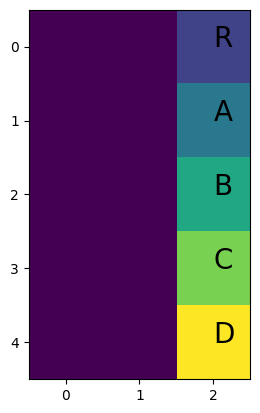

SOLUCIÓN:
MoverBrazo (2,1)   --> MoverBloque(B,1,2) --> 
MoverBrazo (2,1)   --> MoverBloque(A,1,2) --> 
MoverBrazo (2,1)   --> MoverBloque(C,1,2) --> 
MoverBrazo (2,1)   --> MoverBloque(D,1,2) --> 
MoverBloque(D,2,3) --> MoverBrazo (3,2)   --> 
MoverBloque(C,2,3) --> MoverBrazo (3,2)   --> 
MoverBloque(A,2,1) --> MoverBrazo (1,2)   --> 
MoverBloque(B,2,3) --> MoverBrazo (3,2)   --> 
MoverBrazo (2,1)   --> MoverBloque(A,1,2) --> 
MoverBloque(A,2,3)


In [14]:
import time
top=0 # Cima de la pila

estado[top]=inicio
operaciones[top]=0 # Las operaciones van desde 0 hasta max_operaciones-1
op=0
actual=np.array(inicio).astype(int)


while (top>=0): # Mientras queden estados por explorar
    while ((op<max_operaciones) and (top<max_profundidad-1) and not np.array_equal(np.array(actual).astype(int),np.array(fin).astype(int))):
        siguiente=intentar(np.array(actual).astype(int),op) # Intenta realizar la acción op sobre el estado actual
        if not np.array_equal(siguiente,np.zeros(27)): # acción no permitida
            if (not(encontrado(siguiente))):# Si no hemos pasado por ese estado
                top+=1 # Almacenamos en la pila el estado y la acción
                estado[top]=np.array(actual).astype(int)
                operaciones[top]=op
                #print('/',top,texto[operaciones[top]],'-->',bin(estado[top]),end='')
                # Saltamos al siguiente estado
                actual=np.array(siguiente).astype(int)
                clear_output(wait=True)
                representar(actual)
                time.sleep(0.5)
                op=-1 # Para que empiece en 0
        op+=1

    if np.array_equal(np.array(actual).astype(int) & np.array(fin).astype(int),np.array(fin).astype(int)):
        print("SOLUCIÓN:")
        t=1
        while (t<top):
            if t%2==0:
                print(texto[operaciones[t]],"--> ")
            else:
                print(texto[operaciones[t]],"--> ",end='')
            t+=1
        print(texto[operaciones[t]])
        top=0
    actual=estado[top]
    op=operaciones[top]+1
    top-=1